# Bayesian Networks: ASIA Example

A GraViz installation (https://graphviz.org/download/) is needed to view the graphic outputs in this notebook

In [1]:
import numpy as np
import pandas as pd
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import util.extensions

%matplotlib inline 

> Shortness-of-breath (dyspnoea) may be due to tuberculosis, lung cancer or
> bronchitis, or none of them, or more than one of them. A recent visit to Asia
> increases the chances of tuberculosis, while smoking is known to be a
> risk factor for both lung cancer and bronchitis. The results of a single chest X-ray
> do not discriminate between lung cancer and tuberculosis, as neither does the
> presence or absence of dyspnoea.

In [2]:
bn = gum.loadBN("data/asia.net")

## Define random variables

In [3]:
A = bn.nodeId(bn.variableFromName("asia"))
S = bn.nodeId(bn.variableFromName("smoke"))
T = bn.nodeId(bn.variableFromName("tub"))
L = bn.nodeId(bn.variableFromName("lung"))
E = bn.nodeId(bn.variableFromName("either"))
B = bn.nodeId(bn.variableFromName("bronc"))
X = bn.nodeId(bn.variableFromName("xray"))
D = bn.nodeId(bn.variableFromName("dysp"))

## Display Bayesian Network

In [4]:
print(bn)

BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}


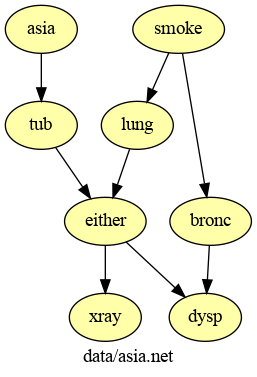

In [5]:
bn.display()

In [6]:
bn.display_tables()

## Inference

In [7]:
# Enables exact inference
ie = gum.LazyPropagation(bn)

### 1/ Global Probability Distribution

It follows from the Bayesian network structure that

$p(A, S, T, L, E, B, X, D) = p(D | E, B) \cdot p(E | T, L) \cdot p(X | E) \cdot p(B | S) \cdot p(L | S) \cdot p(T | A) \cdot p(A) \cdot p(S)$

Note, calculating the global distribution takes exponential time and space - do not do this for larger examples!

In [8]:
ie.addJointTarget(bn.nodes())
ie.makeInference()
glob = ie.jointPosterior(bn.nodes())
glob

(gum::Potential<double>@0x561ffb074010) <either:yes|lung:yes|bronc:yes|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 1.323e-05 /<either:no|lung:yes|bronc:yes|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:yes|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0.00011907 /<either:no|lung:no|bronc:yes|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:no|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 6.86e-06 /<either:no|lung:yes|bronc:no|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:no|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 6.174e-05 /<either:no|lung:no|bronc:no|dysp:yes|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:yes|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 1.47e-06 /<either:no|lung:yes|bronc:yes|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:yes|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 1.323e-05 /<either:no|lung:no|bronc:yes|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:no|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 2.94e-06 /<either:no|lung:yes|bronc:no|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:no|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 2.646e-05 /<either:no|lung:no|bronc:no|dysp:no|smoke:yes|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:yes|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 6.615e-07 /<either:no|lung:yes|bronc:yes|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:yes|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 6.54885e-05 /<either:no|lung:no|bronc:yes|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:no|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 1.2005e-06 /<either:no|lung:yes|bronc:no|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:no|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 0.000118849 /<either:no|lung:no|bronc:no|dysp:yes|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:yes|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 7.35e-08 /<either:no|lung:yes|bronc:yes|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:yes|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 7.2765e-06 /<either:no|lung:no|bronc:yes|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:no|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 5.145e-07 /<either:no|lung:yes|bronc:no|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:no|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 5.09355e-05 /<either:no|lung:no|bronc:no|dysp:no|smoke:no|tub:yes|xray:yes|asia:yes> :: 0 /<either:yes|lung:yes|bronc:yes|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 0.00025137 /<either:no|lung:yes|bronc:yes|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:yes|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 0 /<either:no|lung:no|bronc:yes|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 0.0001026 /<either:yes|lung:yes|bronc:no|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 0.00013034 /<either:no|lung:yes|bronc:no|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:no|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 0 /<either:no|lung:no|bronc:no|dysp:yes|smoke:yes|tub:no|xray:yes|asia:yes> :: 8.55e-06 /<either:yes|lung:yes|bronc:yes|dysp:no|smoke:yes|tub:no|xray:yes|asia:yes> :: 2.793e-05 /<either:no|lung:yes|bronc:yes|dysp:no|smoke:yes|tub:no|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:yes|dysp:no|smoke:yes|tub:no|xray:yes|asia:yes> :: 0 /<either:no|lung:no|bronc:yes|dysp:no|smoke:yes|tub:no|xray:yes|asia:yes> :: 2.565e-05 /<either:yes|lung:yes|bronc:no|dysp:no|smoke:yes|tub:no|xray:yes|asia:yes> :: 5.586e-05 /<either:no|lung:yes|bronc:no|dysp:no|smoke:yes|tub:no|xray:yes|asia:yes> :: 0 /<either:yes|lung:no|bronc:no|dysp:no|smoke:yes|tub:no|xray:yes|asia:yes

### 2/ Marginal distributions
> A patient presents herself at the chest clinic with dyspnoea. She has never been to
Asia. Smoking history and chest X-ray are not yet available. What is the probability
that this patient suffers from bronchitis ?

Marginalize over the global distribution to get the marginal distributions

$p(A, B, D) = \sum_{S, T, L, E, X} p(A, S, T, L, E, B, X, D)$


In [10]:
abd = ie.jointPosterior({A, B, D})
ad = ie.jointPosterior({A, D})

(gum::Potential<double>@0x561ffae164b0) <dysp:yes|asia:yes> :: 0.00450137 /<dysp:no|asia:yes> :: 0.00549862 /<dysp:yes|asia:no> :: 0.431469 /<dysp:no|asia:no> :: 0.558531

Calculate the conditional posterior distribution

In [14]:
cond_post = abd / ad
cond_post

(gum::Potential<double>@0x561ffb0568f0) <dysp:yes|asia:yes|bronc:yes> :: 0.811402 /<dysp:no|asia:yes|bronc:yes> :: 0.154143 /<dysp:yes|asia:no|bronc:yes> :: 0.834203 /<dysp:no|asia:no|bronc:yes> :: 0.1532 /<dysp:yes|asia:yes|bronc:no> :: 0.188598 /<dysp:no|asia:yes|bronc:no> :: 0.845857 /<dysp:yes|asia:no|bronc:no> :: 0.165797 /<dysp:no|asia:no|bronc:no> :: 0.8468

Extract the relevant probabilities form the conditional posterior or calculate them directly

In [18]:
ind = gum.Instantiation(cond_post)
ind['asia'] = 0
ind['bronc'] = 1
ind['dysp'] = 1

cond_post.get(ind)

0.8458569088853791

In [23]:
ie.addAllTargets()
ie.setEvidence({"asia": 0, "dysp": 1})

ind = gum.Instantiation(cond_post)
ind['bronc'] = 1
ie.posterior(B).get(ind)

0.8458569088853791

### 3/ Joint Probabilities

Calculate the joint given the evidence

$p(A = 0, T = 1, S = 0, L = 1, E = 1, B = 0, D = 1, X = 1)$

In [ ]:
ind = gum.Instantiation(glob)
ind['asia'] = 0
ind['tub'] = 1
ind['smoke'] = 0
ind['lung'] = 1
ind['either'] = 1
ind['bronc'] = 0
ind['dysp'] = 1
ind['xray'] = 1

print('Value at position {} is {:.4f}'.format(ind, glob.get(ind)))

In [ ]:
ind = gum.Instantiation(glob)
ind['asia'] = 1
ind['tub'] = 1
ind['smoke'] = 0
ind['lung'] = 1
ind['either'] = 1
ind['bronc'] = 0
ind['dysp'] = 1
ind['xray'] = 1

print('Value at position {} is {:.4f}'.format(ind, glob.get(ind)))

We can display the effect again.

In [ ]:
gnb.showInference(bn, evs={})